# Importing Libraries

In [39]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [40]:
dataset=pd.DataFrame(pd.read_excel("Social_Network_Ads.xlsx"))
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Data Cleaning

In [41]:
dataset.isnull().sum()

User ID             0
Gender              0
Age                 0
EstimatedSalary     0
Purchased           0
dtype: int64

In [42]:
X=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

# Splitting the Dataset

In [43]:
from sklearn.model_selection import train_test_split   
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) 


# Scaling the Data

In [44]:
from sklearn.preprocessing import StandardScaler 
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)

# Model Fitting

In [45]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

# Plotting Decision Tree

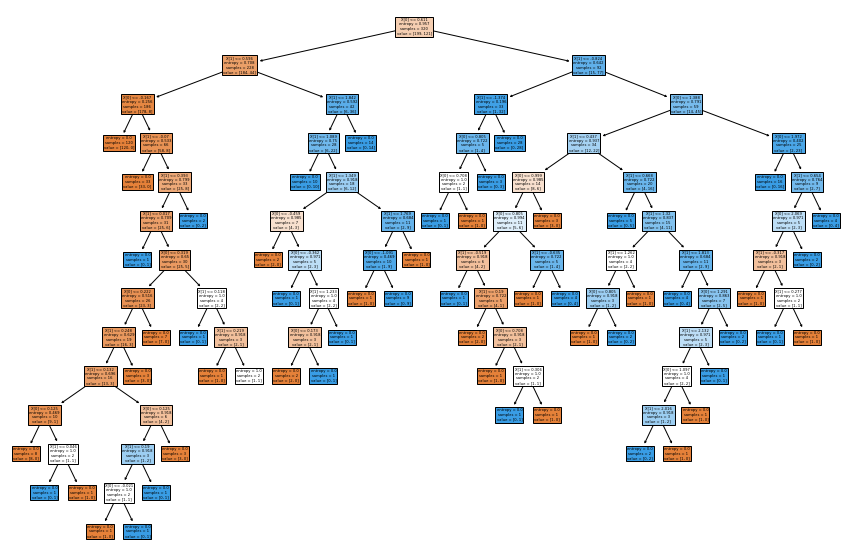

In [46]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

# Accuracy(r2 score)

In [47]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred = clf.predict(X_test)
y_train = clf.predict(X_train)
from sklearn.metrics import accuracy_score 
print("Train Accuracy is:",accuracy_score(y_train,y_train))
print("Test Accuracy is:",accuracy_score(y_test,y_pred))

Train Accuracy is: 1.0
Test Accuracy is: 0.925


# Confusion Matrix 

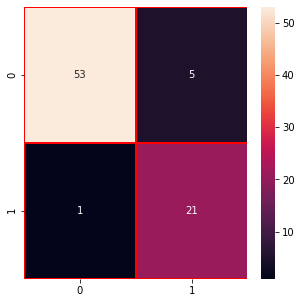

In [48]:
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.show()

# Classification Report

In [49]:
cr =classification_report(y_test,y_pred)
print("Classification Report")
print(cr)

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.91      0.95        58
           1       0.81      0.95      0.88        22

    accuracy                           0.93        80
   macro avg       0.89      0.93      0.91        80
weighted avg       0.93      0.93      0.93        80



# Visualising the Training Set

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


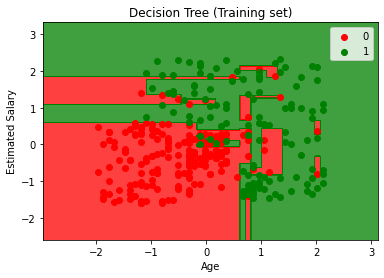

In [50]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,clf.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('Decision Tree (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()